In [1]:
import numpy as np
import matplotlib.pyplot as plt
import models
from scipy import optimize
from Pymod import prep
from plotter import semlog
%matplotlib inline
%load_ext autoreload

In [2]:
WT_09_lbl, WT_09_rtot, WT_09_lig, WT_09_sat = prep.datprep('Data/EGFR_WT_09_Sat.csv','Data/EGFR_WT_09_Rtot.csv')

hootie hoo! the indices match!


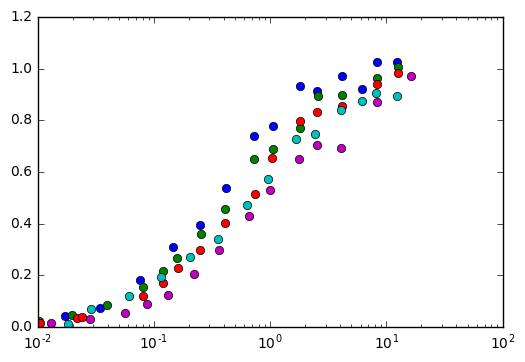

In [3]:
semlog(WT_09_lig,WT_09_sat)

In [4]:
k11r = np.clip(np.random.normal(4.6,0.46,10000),0.0001,np.inf)
k21r = np.clip(np.random.normal(2.0,0.2,10000),0.0001,np.inf)
k22r = np.clip(np.random.normal(0.19,0.07,10000),0.0001,np.inf)
l20r = np.clip(np.random.normal(860.,300.,10000),0.0001,np.inf)

In [5]:
parmset = np.stack([k11r,k21r,k22r,l20r],1)

In [12]:
WT_09_rtot

array([ 0.0005889,  0.002544 ,  0.00643  ,  0.01263  ,  0.05509  ])

In [13]:
rtot_guess = np.array([0.001,0.002,0.005,0.01,0.03])

In [14]:
bounds1 = tuple(0.0 for i in range(5)),tuple(1.0 for i in range(5))

In [15]:
res = [optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_09_lig,WT_09_sat,i)).x for i in parmset]

In [16]:
resar = np.array(res)

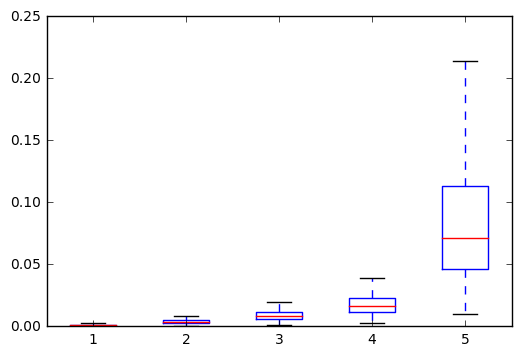

In [17]:
boxplot = plt.boxplot(resar, showfliers=False)

In [20]:
np.median(resar,axis=0)

array([ 0.00091035,  0.00344269,  0.00835584,  0.01621863,  0.07108079])

In [21]:
WT_09_Parms = np.array([4.6,2.0,0.19,860.])

In [22]:
res2 = optimize.least_squares(models.wym_rtot_sp,rtot_guess,bounds=bounds1,args=(WT_09_lig,WT_09_sat,WT_09_Parms))

In [23]:
res2.x

array([ 0.00090472,  0.00342469,  0.00832071,  0.01607519,  0.0689238 ])

In [32]:
np.histogram(resar[:,1],bins=10)

(array([9972,    3,    1,    1,    0,    1,    0,    1,    0,   21]),
 array([  2.99171493e-04,   1.00269254e-01,   2.00239337e-01,
          3.00209420e-01,   4.00179503e-01,   5.00149586e-01,
          6.00119669e-01,   7.00089751e-01,   8.00059834e-01,
          9.00029917e-01,   1.00000000e+00]))

In [33]:
a = resar[:,1]

In [35]:
(a < 1.002E-1).sum()

9972

In [36]:
b = a[(a < 1.002E-1)]

In [37]:
a.size

10000

In [38]:
b.size

9972

(array([  1.98000000e+02,   1.67700000e+03,   2.63600000e+03,
          2.14100000e+03,   1.28300000e+03,   7.24000000e+02,
          4.63000000e+02,   2.48000000e+02,   1.77000000e+02,
          9.40000000e+01,   6.70000000e+01,   6.00000000e+01,
          3.30000000e+01,   2.50000000e+01,   1.60000000e+01,
          1.30000000e+01,   1.80000000e+01,   1.20000000e+01,
          7.00000000e+00,   7.00000000e+00,   5.00000000e+00,
          8.00000000e+00,   9.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   6.00000000e+00,
          1.00000000e+00,   2.00000000e+00,   4.00000000e+00,
          3.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   0.00000000e+00,
          2.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
        

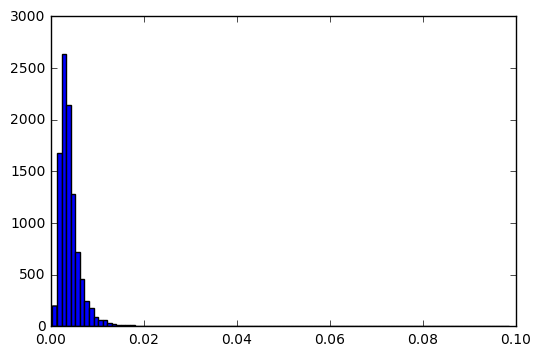

In [40]:
plt.hist(b,bins=100)

In [42]:
np.histogram(resar[:,4],bins=10)

(array([7306, 1849,  467,  166,   57,   38,   24,   13,   11,   69]),
 array([ 0.01003872,  0.10903484,  0.20803097,  0.3070271 ,  0.40602323,
         0.50501936,  0.60401549,  0.70301161,  0.80200774,  0.90100387,  1.        ]))

In [43]:
(resar[:,4] > 0.3).sum()

400

(array([ 7306.,  1849.,   467.,   166.,    57.,    38.,    24.,    13.,
           11.,    69.]),
 array([ 0.01003872,  0.10903484,  0.20803097,  0.3070271 ,  0.40602323,
         0.50501936,  0.60401549,  0.70301161,  0.80200774,  0.90100387,  1.        ]),
 <a list of 10 Patch objects>)

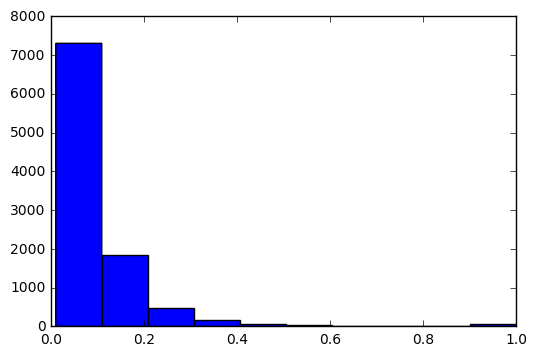

In [44]:
plt.hist(resar[:,4])

In [45]:
import corner

In [46]:
corner.corner(parmset,resar)

ValueError: Dimension mismatch between bins and range

In [47]:
corner.corner(parmset[3],resar[5])

ValueError: Dimension mismatch between bins and range

In [49]:
parmset[:,3].size

10000

In [53]:
resar[:,4].size

10000

In [54]:
corner.corner(parmset[:,3],resar[:,4])

ValueError: Dimension mismatch between bins and range

In [57]:
samps = np.stack([parmset[:,3],resar[:,4]],1)

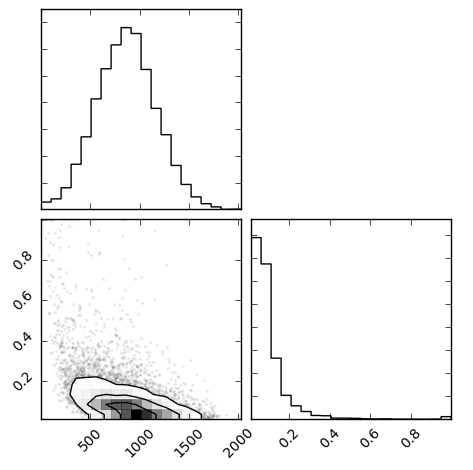

In [59]:
a = corner.corner(samps)

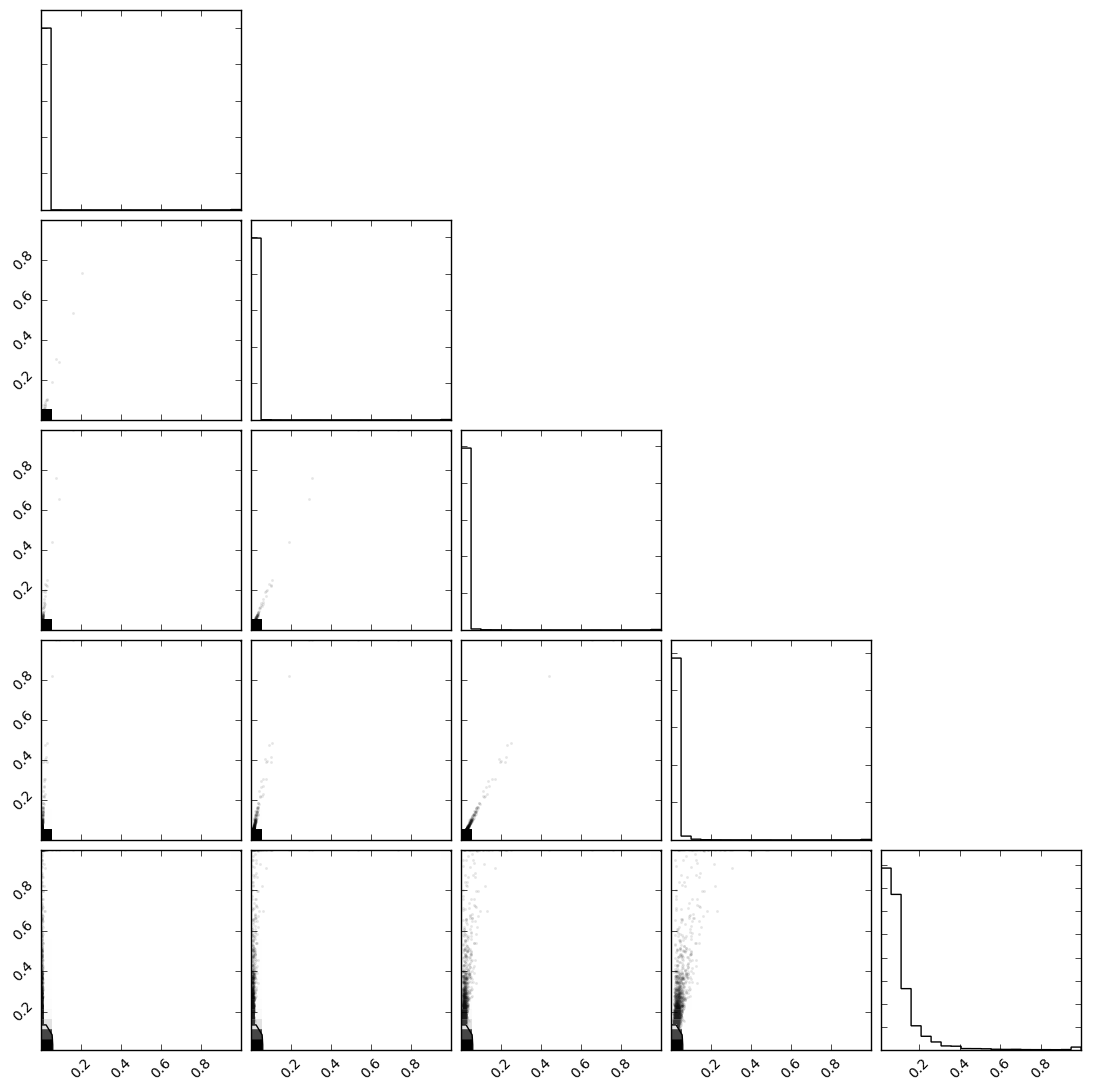

In [61]:
b = corner.corner(resar)

In [70]:
c = corner.corner(np.stack([parmset,resar[:,4]],1))

ValueError: all input arrays must have the same shape

In [75]:
b = np.append(parmset,resar[:,4])

In [79]:
resar[:,4].shape

(10000,)

In [80]:
c = np.transpose(resar[:,4])

In [81]:
c.shape

(10000,)

In [82]:
c

array([ 0.11546178,  0.03992647,  0.02353774, ...,  0.10043379,
        0.06593888,  0.04093096])

In [83]:
resar[:,4]

array([ 0.11546178,  0.03992647,  0.02353774, ...,  0.10043379,
        0.06593888,  0.04093096])

In [86]:
d = np.array([[1,2,3],[4,5,6],[7,8,9]])

In [87]:
d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [89]:
np.insert(d,3,5,axis=1)

array([[1, 2, 3, 5],
       [4, 5, 6, 5],
       [7, 8, 9, 5]])

In [90]:
d

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [91]:
q = [4,4,4]

In [92]:
np.insert(d,3,q,axis=1)

array([[1, 2, 3, 4],
       [4, 5, 6, 4],
       [7, 8, 9, 4]])

In [94]:
newset = np.insert(parmset,4,resar[:,4],axis=1)

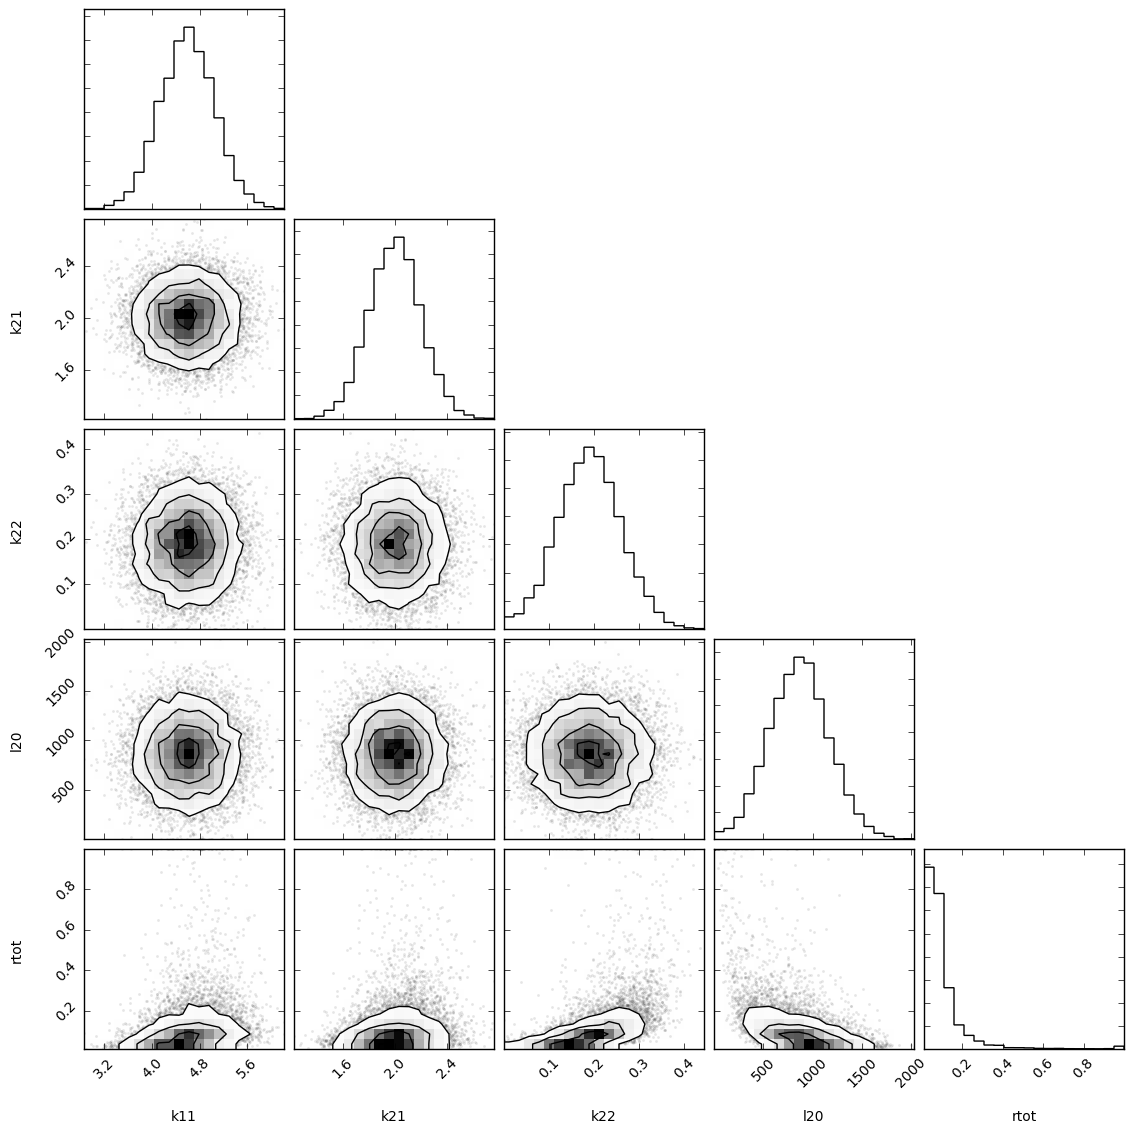

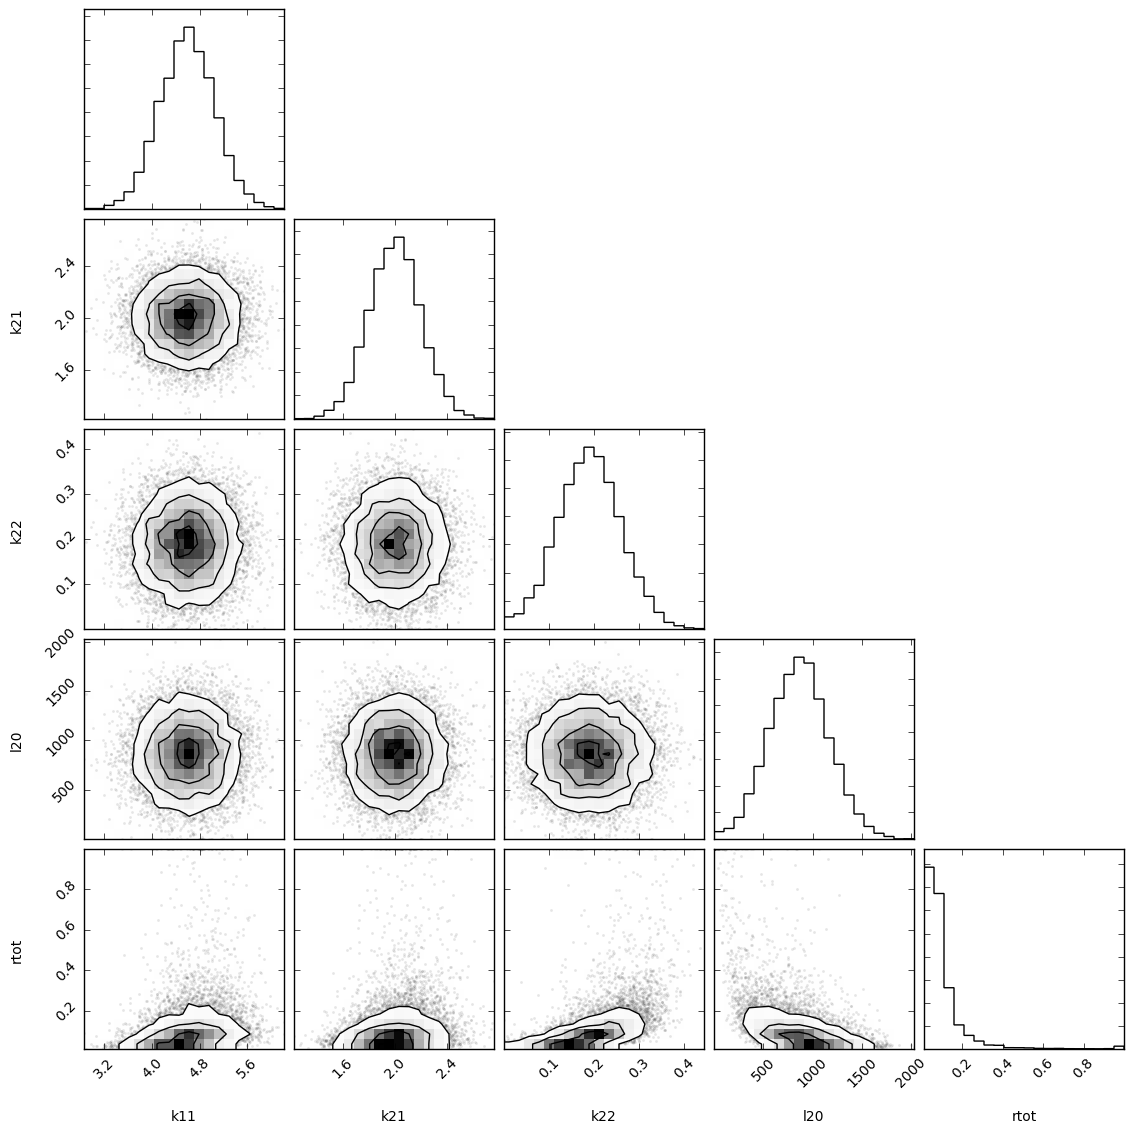

In [96]:
corner.corner(newset,labels=['k11','k21','k22','l20','rtot'])

In [97]:
WT_09_lbl

['20k', '46k', '187k', '256k', '1200k']

In [98]:
nominals = np.array([20,46,187,256,1200])

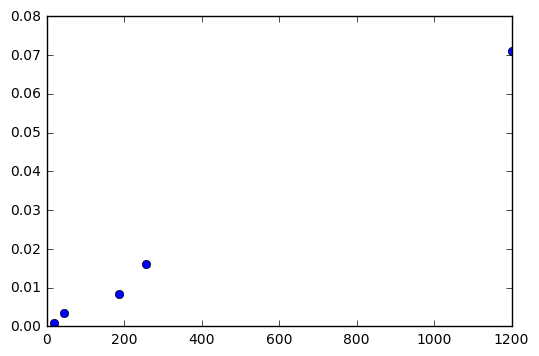

In [102]:
plt.plot(nominals,np.median(resar,axis=0),'o')

In [101]:
np.median(resar,axis=0)

array([ 0.00091035,  0.00344269,  0.00835584,  0.01621863,  0.07108079])